In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

# =============================
# 1. Data Augmentation & Generators
# =============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    "D:/Project(Final Year)/dataset",  # <- path to your dataset root
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    "D:/Project(Final Year)/dataset",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

class_labels = list(train_generator.class_indices.keys())
print("Class Labels:", class_labels)

# =============================
# 2. Build Transfer Learning Model
# =============================
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128, 128, 3))

# Freeze base model first
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(len(class_labels), activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# =============================
# 3. Train (Head only)
# =============================
history = model.fit(train_generator, validation_data=val_generator, epochs=5)

# =============================
# 4. Fine-tune last layers
# =============================
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
              loss="categorical_crossentropy", metrics=["accuracy"])

history_ft = model.fit(train_generator, validation_data=val_generator, epochs=10)

# =============================
# 5. Evaluate with Confusion Matrix
# =============================
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print("Confusion Matrix")
print(confusion_matrix(val_generator.classes, y_pred))
print("Classification Report")
print(classification_report(val_generator.classes, y_pred, target_names=class_labels))



Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Class Labels: ['garbage', 'road']


c:\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.5271 - loss: 1.0720 - val_accuracy: 0.5800 - val_loss: 0.8642
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6207 - loss: 0.8045 - val_accuracy: 0.7000 - val_loss: 0.5847
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6650 - loss: 0.7245 - val_accuracy: 0.8000 - val_loss: 0.5381
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7044 - loss: 0.4750 - val_accuracy: 0.8200 - val_loss: 0.4106
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8276 - loss: 0.4090 - val_accuracy: 0.8000 - val_loss: 0.4605
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.7192 - loss: 0.5768 - val_accuracy: 0.7800 - val_loss: 0.5245
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7340 - loss: 0.5598 - val_accuracy: 0.8000 - val_loss: 0.4813
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7734 - loss: 0.5407 - val_accuracy: 0.9000 - val_loss: 0.4244
Epoch 4/10
7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


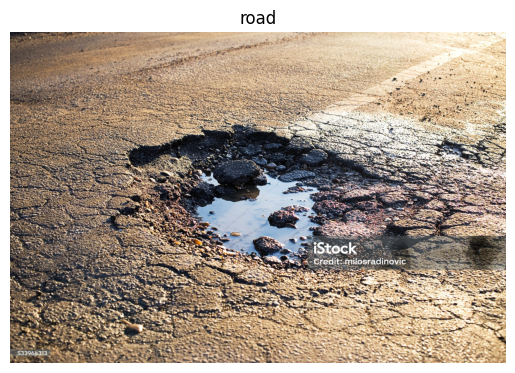

Accuracy :  95.034065


In [25]:
image_path = "C:/Users/PRAVIN/OneDrive/Desktop/istockphoto-533964313-2048x2048.jpg"
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(predicted_class)
plt.show()
print("Accuracy : ",confidence*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


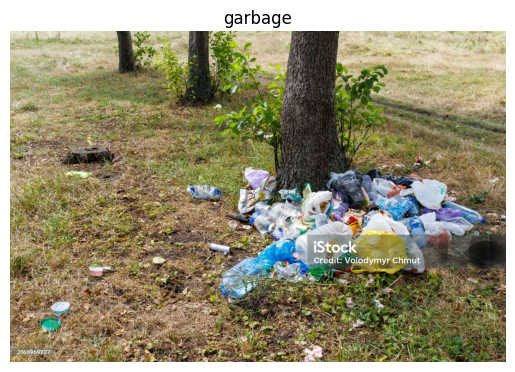

Accuracy :  99.937904


In [26]:
image_path = "C:/Users/PRAVIN/OneDrive/Desktop/istockphoto-2165969737-2048x2048.jpg"
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(predicted_class)
plt.show()
print("Accuracy : ",confidence*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


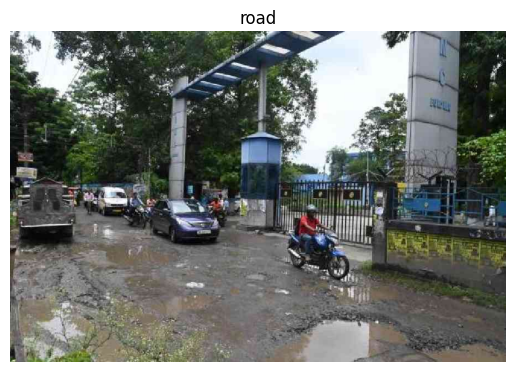

Accuracy :  96.43834


In [24]:
image_path = "C:/Users/PRAVIN/OneDrive/Desktop/1.jpg"
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(predicted_class)
plt.show()
print("Accuracy : ",confidence*100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


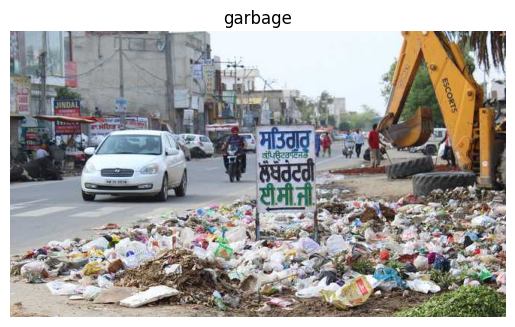

In [ ]:
image_path = "C:/Users/PRAVIN/OneDrive/Desktop/2.jpg"
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]
confidence = np.max(prediction)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title(predicted_class)
plt.show()
print("Accuracy : ",confidence*100)
